HELLO TRANSFORMERS


In [1]:
from datasets import list_datasets

In [2]:
all_datasets = list_datasets()
print(f"there are {len(all_datasets)} datasets")

<ipython-input-2-f3d70ba34959>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


there are 73891 datasets


In [3]:
print(all_datasets[:5])

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus']


In [14]:
from datasets import load_dataset

In [15]:
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/erdem/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
train_ds = emotions["train"]
validate_ds = emotions["validation"]
test_ds = emotions["test"]

In [10]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

# Analyzing Dataset

In [11]:
import pandas as pd

In [12]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [14]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [15]:
import matplotlib.pyplot as plt

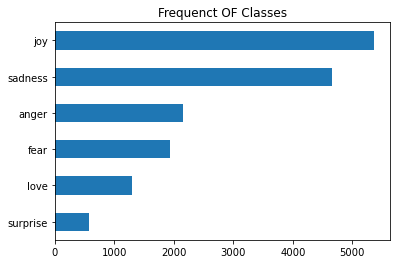

In [35]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequenct OF Classes")
plt.show()

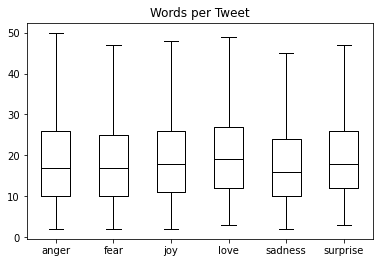

In [16]:
df["Words per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words per Tweet", by="label_name", grid=False, showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [17]:
emotions.reset_format()

# Tokenization

In [9]:
text = "Hello Kuanta. Hope you are enjoying making millions!"

In [7]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [10]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 7592, 13970, 26802, 1012, 3246, 2017, 2024, 9107, 2437, 8817, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## Tokenizing The Whole Dataset

In [11]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [16]:
tokenized_batch_sample = tokenize(emotions["train"][:4])
print(len(tokenized_batch_sample["input_ids"][0]))

23


In [17]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [53]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# Transformers as Feature Extractors

In [20]:
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

AttributeError: module 'torch' has no attribute '_six'